In [28]:
# Importing libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle

In [29]:
# Read in dataset, and then display it so we can see what we are working with
df = pd.read_csv('flying-etiquette.csv')
print(df.shape)
df.head(5)

(1040, 27)


,RespondentID,How often do you travel by plane?,Do you ever recline your seat when you fly?,How tall are you?,Do you have any children under 18?,"In a row of three seats, who should get to use the two arm rests?","In a row of two seats, who should get to use the middle arm rest?",Who should have control over the window shade?,Is itrude to move to an unsold seat on a plane?,"Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?",...,Is itrude to wake a passenger up if you are trying to walk around?,"In general, is itrude to bring a baby on a plane?","In general, is it rude to knowingly bring unruly children on a plane?",Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?,Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?,Gender,Age,Household Income,Education,Location (Census Region)
0,3436139758,Once a year or less,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3434278696,Once a year or less,About half the time,"6'3""",Yes,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"No, not at all rude","No, not at all rude","No, not at all rude",No,No,Male,30-44,NaN,Graduate degree,Pacific
2,3434275578,Once a year or less,Usually,"5'8""",No,Whoever puts their arm on the arm rest first,The arm rests should be shared,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$100,000 - $149,999",Bachelor degree,Pacific
3,3434268208,Once a year or less,Always,"5'11""",No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$0 - $24,999",Bachelor degree,Pacific
4,3434250245,Once a month or less,About half the time,"5'7""",No,The person in the middle seat gets both arm rests,The person in aisle,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",Yes,No,Male,30-44,"$50,000 - $99,999",Bachelor degree,Pacific


In [30]:
# Drops the NA's in the dataset
# This means people who said they have never flown and therefore did not have responses to the other questions
cleandf = df.dropna()
cleandf

,RespondentID,How often do you travel by plane?,Do you ever recline your seat when you fly?,How tall are you?,Do you have any children under 18?,"In a row of three seats, who should get to use the two arm rests?","In a row of two seats, who should get to use the middle arm rest?",Who should have control over the window shade?,Is itrude to move to an unsold seat on a plane?,"Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?",...,Is itrude to wake a passenger up if you are trying to walk around?,"In general, is itrude to bring a baby on a plane?","In general, is it rude to knowingly bring unruly children on a plane?",Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?,Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?,Gender,Age,Household Income,Education,Location (Census Region)
2,3434275578,Once a year or less,Usually,"5'8""",No,Whoever puts their arm on the arm rest first,The arm rests should be shared,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$100,000 - $149,999",Bachelor degree,Pacific
3,3434268208,Once a year or less,Always,"5'11""",No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$0 - $24,999",Bachelor degree,Pacific
4,3434250245,Once a month or less,About half the time,"5'7""",No,The person in the middle seat gets both arm rests,The person in aisle,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",Yes,No,Male,30-44,"$50,000 - $99,999",Bachelor degree,Pacific
5,3434245875,Once a year or less,Usually,"5'9""",Yes,Whoever puts their arm on the arm rest first,Whoever puts their arm on the arm rest first,The person in the window seat should have excl...,"Yes, somewhat rude","No, not at all rude",...,"Yes, very rude","Yes, very rude","Yes, very rude",No,No,Male,30-44,"$25,000 - $49,999",Graduate degree,East North Central
6,3434235351,Once a month or less,Once in a while,"6'2""",Yes,The person in the middle seat gets both arm rests,Whoever puts their arm on the arm rest first,Everyone in the row should have some say,"No, not rude at all","Yes, somewhat rude",...,"No, not at all rude","No, not at all rude","Yes, somewhat rude",No,No,Male,30-44,150000,Some college or Associate degree,Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,3431737008,Once a year or less,Never,"5'4""",No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","Yes, somewhat rude",...,"No, not at all rude","No, not at all rude","Yes, somewhat rude",No,No,Female,> 60,"$50,000 - $99,999",Graduate degree,West North Central
1032,3431735911,Once a year or less,Always,"5'3""",No,Whoever puts their arm on the arm rest first,Whoever puts their arm on the arm rest first,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",...,"Yes, very rude","Yes, very rude","Yes, very rude",Yes,No,Female,30-44,150000,High school degree,Middle Atlantic
1034,3431734398,A few times per month,Once in a while,"6'1""",Yes,The person in the middle seat gets both arm rests,Other (please specify),Everyone in the row should have some say,"No, not rude at all","Yes, somewhat rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, somewhat rude",No,No,Male,30-44,150000,Graduate degree,Pacific
1035,3431732652,Once a year or less,Once in a while,"5'7""",No,Other (please specify),Other (please specify),Everyone in the row should have some say,"No, not rude at all","No, not at

18-29    138
30-44    179
45-60    206
> 60     164
Name: Age, dtype: int64


Text(0.5, 1.0, 'Age of Surveyee')

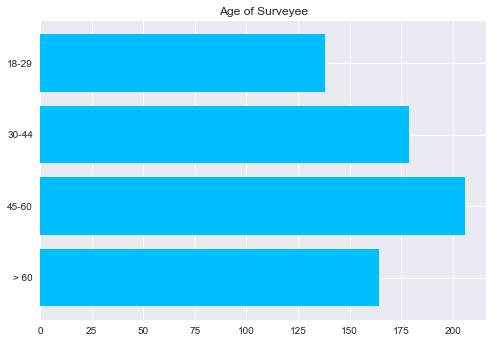

In [31]:
# Code chunk to see what the group of people we are working with
# Counts how many times people fly in the dataset
Age = cleandf['Age'].value_counts().reindex(['18-29','30-44', '45-60', '> 60'])
print(Age)
Agelabels = '18-29','30-44', '45-60', '> 60'

# Creates a graph that shows the results
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.barh(Agelabels, Age, color = 'deepskyblue', align='center')
ax.invert_yaxis()
ax.set_title('Age of Surveyee')

Once a year or less      500
Once a month or less     158
A few times per month     26
A few times per week       2
Every day                  1
Name: How often do you travel by plane?, dtype: int64


Text(0.5, 1.0, 'How frequently do you fly?')

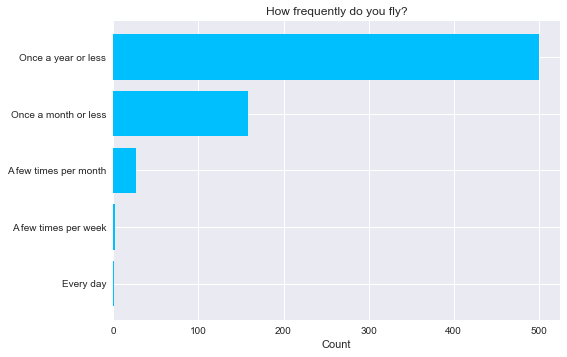

In [32]:
# Code chunk to see what the group of people we are working with
# Counts how many times people fly in the dataset
plane = cleandf['How often do you travel by plane?'].value_counts()
print(plane)
planelabels = 'Once a year or less', 'Once a month or less', 'A few times per month', 'A few times per week', 'Every day'

# Creates a graph that shows the results
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.barh(planelabels, plane, color = 'deepskyblue', align='center')
ax.invert_yaxis()
ax.set_xlabel('Count')
ax.set_title('How frequently do you fly?')

Always                 112
About half the time     93
Usually                154
Once in a while        199
Never                  129
Name: Do you ever recline your seat when you fly?, dtype: int64


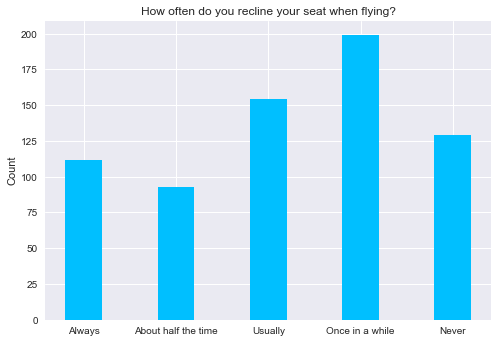

In [33]:
# Counts how often people recline their seat when they fly
recline = cleandf['Do you ever recline your seat when you fly?'].value_counts().reindex(["Always", "About half the time", "Usually", "Once in a while", "Never"])
print(recline)
reclinelabels = ["Always", "About half the time", "Usually", "Once in a while", "Never"]

# Visualization
plt.style.use('seaborn')
plt.bar(reclinelabels, recline, color = 'deepskyblue', width = 0.4)
plt.ylabel("Count")
plt.title("How often do you recline your seat when flying?")
plt.show()

In [34]:
next = cleandf['Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?'].value_counts()
next

Yes, they should not recline their chair if the person behind them asks them not to    438
No, the person on the flight has no obligation to the person behind them               249
Name: Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

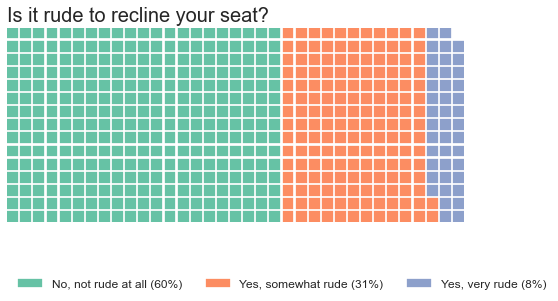

In [35]:
# 
next = cleandf['Is itrude to recline your seat on a plane?'].value_counts()
next
rude = {'No, not rude at all': 413, 'Yes, somewhat rude': 219, 'Yes, very rude': 55}

# 
plt.style.use('seaborn')
plt.figure(
    FigureClass=Waffle,
    rows=15,
    columns=35,
    values= next,
    rounding_rule='floor',
    title={
        'label': 'Is it rude to recline your seat?',
        'loc': 'left',
        'fontdict': {
            'fontsize': 20
        }
    },
    labels=[f"{k} ({int(v / sum(rude.values()) * 100)}%)" for k, v in rude.items()],
    legend={
        # 'labels': [f"{k} ({v}%)" for k, v in data.items()],  # lebels could also be under legend instead
        'loc': 'lower left',
        'bbox_to_anchor': (0, -0.4),
        'ncol': len(rude),
        'framealpha': 0,
        'fontsize': 12
    }
)
plt.show

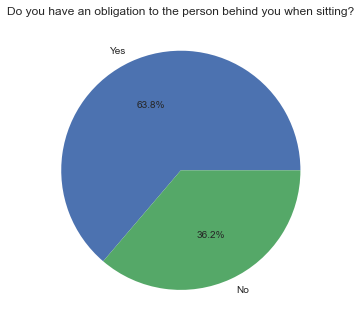

In [36]:
oblig = cleandf['Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?'].value_counts()
obliglabels = ['Yes','No']

plt.style.use('seaborn')
plt.pie(oblig, labels=obliglabels, autopct='%1.1f%%')
plt.title("Do you have an obligation to the person behind you when sitting?")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

C:\Users\austi\miniconda3\lib\site-packages\IPython\core\pylabtools.py:137: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


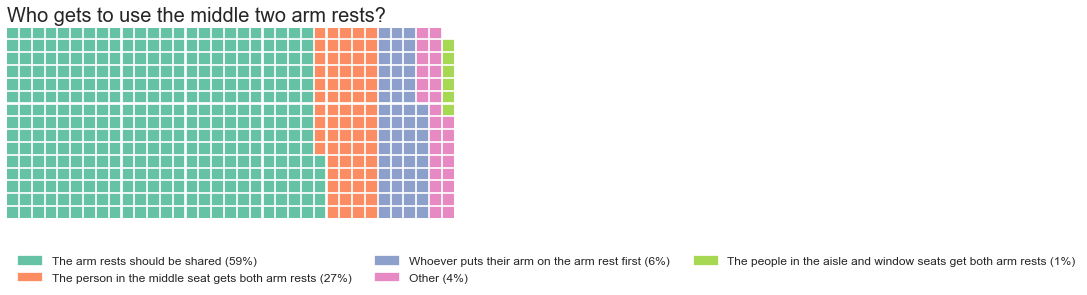

In [37]:
# Counts people's responses on who should get to use the two arm rests
armrest = cleandf['In a row of three seats, who should get to use the two arm rests?'].value_counts()
armrest
arm = {'The arm rests should be shared': 478, 'The person in the middle seat gets both arm rests': 219, 'Whoever puts their arm on the arm rest first': 55, 'Other': 38, 'The people in the aisle and window seats get both arm rests': 8}

# Visualize Data
plt.style.use('seaborn')
plt.figure(
    FigureClass=Waffle,
    rows=15,
    columns=35,
    values= armrest,
    rounding_rule='floor',
    title={
        'label': 'Who gets to use the middle two arm rests?',
        'loc': 'left',
        'fontdict': {
            'fontsize': 20
        }
    },
    labels=[f"{k} ({int(v / sum(arm.values()) * 100)}%)" for k, v in arm.items()],
    legend={
        # 'labels': [f"{k} ({v}%)" for k, v in data.items()],  # lebels could also be under legend instead
        'loc': 'lower left',
        'bbox_to_anchor': (0, -0.4),
        'ncol': len(rude),
        'framealpha': 0,
        'fontsize': 12
    }
)
plt.show

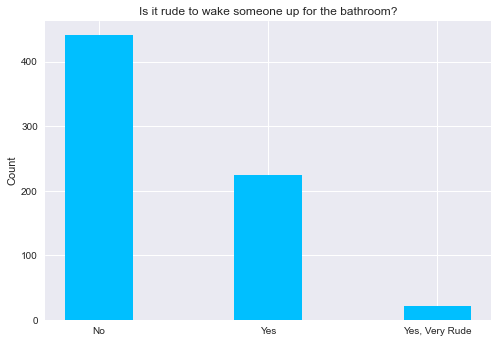

In [43]:
# Counts whether it is rude to wake up someone for the bathroom
bathroom = cleandf['Is it rude to wake a passenger up if you are trying to go to the bathroom?'].value_counts()
bathroom
bathroomlabels = ['No', 'Yes', 'Yes, Very Rude']

# Visualize Data
plt.style.use('seaborn')
plt.bar(bathroomlabels, bathroom, color = 'deepskyblue', width = 0.4)
plt.ylabel("Count")
plt.title("Is it rude to wake someone up for the bathroom?")
plt.show()

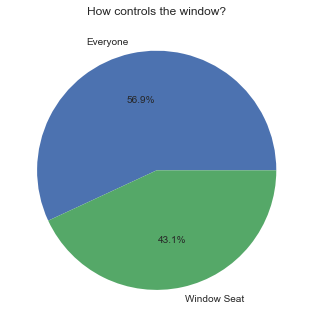

In [39]:
# Counts people's responses on who controls the window
window = cleandf['Who should have control over the window shade?'].value_counts()
windowlabels = ['Everyone', 'Window Seat']

# Visualize Data
plt.style.use('seaborn')
plt.pie(window, labels=windowlabels, autopct='%1.1f%%')
plt.title("Who controls the window?")
plt.show()

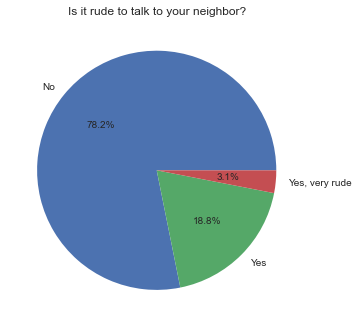

In [42]:
# Counts people's responses on who controls the window
speaking = cleandf['Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?'].value_counts()
speakinglabel = ['No', 'Yes', 'Yes, very rude']

# Visualize Data
plt.style.use('seaborn')
plt.pie(speaking, labels=speakinglabel, autopct='%1.1f%%')
plt.title("Is it rude to talk to your neighbor?")
plt.show()